In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('CompleteDataSet.csv')

In [6]:
data['Activity'].value_counts()

Activity
6     54568
7     54032
8     53689
11    50872
10    26694
4      9248
3      9237
1      9204
2      9188
5      9074
9      8872
Name: count, dtype: int64

In [7]:

data_dropped = data.drop(columns=['TimeStamps'])
data_dropped


,AnkleAccelerometer(x),AnkleAccelerometer(y),AnkleAccelerometer(z),AnkleAngularVelocity(x),AnkleAngularVelocity(y),AnkleAngularVelocity(z),AnkleLuminosity,RightPocketAccelerometer(x),RightPocketAccelerometer(y),RightPocketAccelerometer(z),...,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6,Subject,Activity,Trial,Tag
0,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.000,-0.981,0.260,0.098,...,1,1,1,1,1,1,1,1,1,7
1,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.000,-0.981,0.260,0.098,...,1,1,1,1,1,1,1,1,1,7
2,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.000,-0.975,0.282,0.091,...,1,1,1,1,1,1,1,1,1,7
3,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.000,-0.973,0.301,0.103,...,1,1,1,1,1,1,1,1,1,7
4,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.000,-0.973,0.301,0.103,...,1,1,1,1,1,1,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294673,0.247,0.948,0.120,-1.646,0.488,-0.061,311.969,-0.479,-0.118,0.963,...,1,1,1,0,1,1,17,11,3,11
294674,0.247,0.952,0.121,-1.037,0.732,-0.244,311.969,-0.488,-0.119,0.970,...,1,1,1,0,1,1,17,11,3,11
294675,0.246,0.952,0.115,-0.610,0.732,-0.061,311.969,-0.488,-0.119,0.970,...,1,1,1,0,1,1,17,11,3,11
294676,0.249,0.949,0.120,-0.854,0.427,-0.061,311.969,-0.472,-0.116,0.968,...,1,1,1,0,1,1,17,11,3,11


In [8]:
data['Activity'].value_counts()

Activity
6     54568
7     54032
8     53689
11    50872
10    26694
4      9248
3      9237
1      9204
2      9188
5      9074
9      8872
Name: count, dtype: int64

In [5]:
# data_dropped = data_dropped.drop(index=0)

In [10]:
data_dropped.isna().sum()

AnkleAccelerometer(x)                0
AnkleAccelerometer(y)                0
AnkleAccelerometer(z)                0
AnkleAngularVelocity(x)              0
AnkleAngularVelocity(y)              0
AnkleAngularVelocity(z)              0
AnkleLuminosity                      0
RightPocketAccelerometer(x)      36109
RightPocketAccelerometer(y)      36109
RightPocketAccelerometer(z)      36109
RightPocketAngularVelocity(x)    36109
RightPocketAngularVelocity(y)    36109
RightPocketAngularVelocity(z)    36109
RightPocketLuminosity            36109
BeltAccelerometer(x)                 0
BeltAccelerometer(y)                 0
BeltAccelerometer(z)                 0
BeltAngularVelocity(x)               0
BeltAngularVelocity(y)               0
BeltAngularVelocity(z)               0
BeltLuminosity                       0
NeckAccelerometer(x)                 0
NeckAccelerometer(y)                 0
NeckAccelerometer(z)                 0
NeckAngularVelocity(x)               0
NeckAngularVelocity(y)   

In [11]:
columns_to_impute = ['RightPocketAccelerometer(x)', 'RightPocketAccelerometer(y)', 'RightPocketAccelerometer(z)',
                     'RightPocketAngularVelocity(x)', 'RightPocketAngularVelocity(y)', 'RightPocketAngularVelocity(z)', 'RightPocketLuminosity', 'BrainSensor']
for col in columns_to_impute:
    data_dropped[col] = data_dropped[col].fillna(data_dropped[col].median())



In [13]:
data_dropped.isna().sum().sum()

0

In [14]:
data_cleaned_final = data_dropped.copy()

In [15]:
data_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294678 entries, 0 to 294677
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AnkleAccelerometer(x)          294678 non-null  float64
 1   AnkleAccelerometer(y)          294678 non-null  float64
 2   AnkleAccelerometer(z)          294678 non-null  float64
 3   AnkleAngularVelocity(x)        294678 non-null  float64
 4   AnkleAngularVelocity(y)        294678 non-null  float64
 5   AnkleAngularVelocity(z)        294678 non-null  float64
 6   AnkleLuminosity                294678 non-null  float64
 7   RightPocketAccelerometer(x)    294678 non-null  float64
 8   RightPocketAccelerometer(y)    294678 non-null  float64
 9   RightPocketAccelerometer(z)    294678 non-null  float64
 10  RightPocketAngularVelocity(x)  294678 non-null  float64
 11  RightPocketAngularVelocity(y)  294678 non-null  float64
 12  RightPocketAngularVelocity(z) 

In [16]:
for i in data_cleaned_final.columns:
    if data_cleaned_final[i].dtype == object:
        data_cleaned_final[i] = data_cleaned_final[i].astype(float)

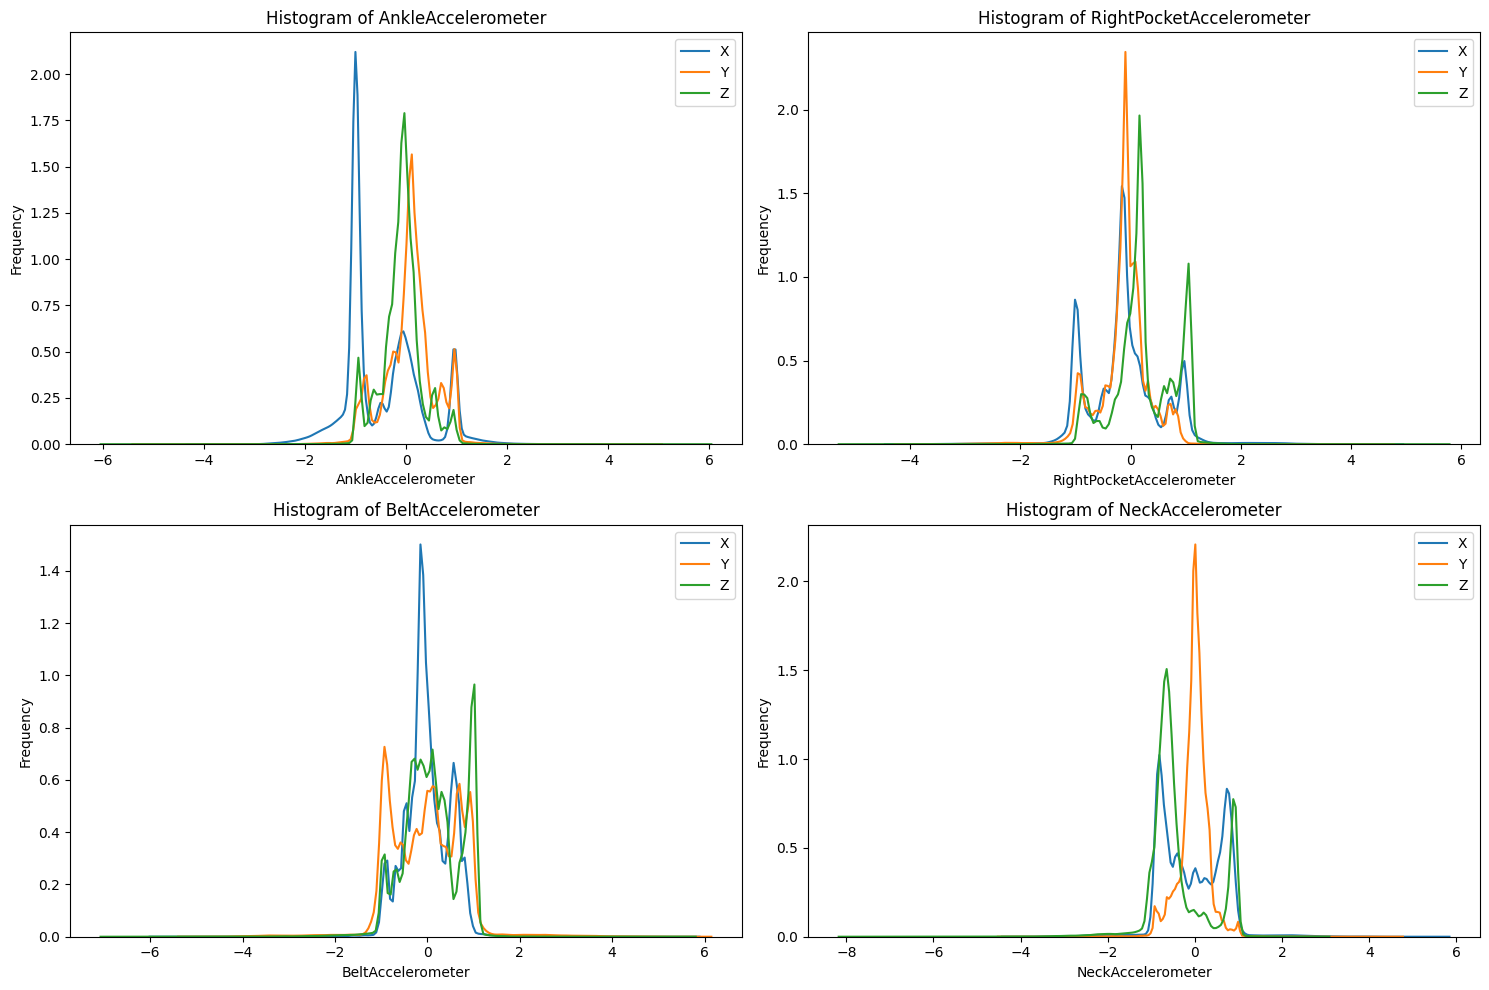

In [25]:
sensor_columns = ['AnkleAccelerometer', 'RightPocketAccelerometer', 'BeltAccelerometer', 'NeckAccelerometer']
plt.figure(figsize=(15, 10))

for i, col in enumerate(sensor_columns):
    # Create a subplot in a 2x2 configuration
    plt.subplot(2, 2, i + 1)
    for axis in ['x', 'y', 'z']:
        sns.kdeplot(data=data_cleaned_final[col + f"({axis})"], label=f'{axis.capitalize()}')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
activity_labels = {
    1: 'Falling forwards',
    2: 'Falling on knees',
    3: 'Falling backwards',
    4: 'Falling sideways',
    5: 'Falling from knees',
    6: 'Walking',
    7: 'Standing',
    8: 'Sitting',
    9: 'Picking up',
    10: 'Jumping',
    11: 'Lying'
}

data_cleaned_final['ActivityLabel'] = data_cleaned_final['Activity'].map(activity_labels)

C:\Users\Saadu\AppData\Local\Temp\ipykernel_12180\1044687100.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


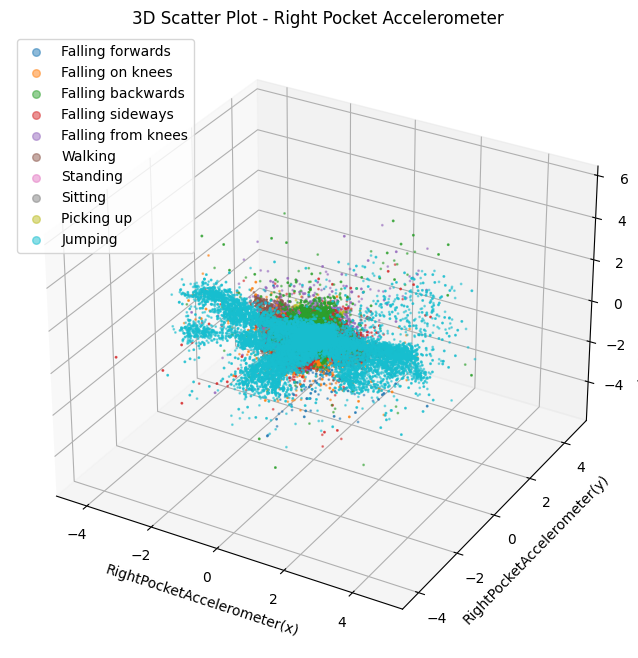

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for activity, color in zip(data_cleaned_final['ActivityLabel'].unique(), plt.cm.tab10.colors):
    subset = data_cleaned_final[data_cleaned_final['ActivityLabel'] == activity]
    ax.scatter(subset['RightPocketAccelerometer(x)'], subset['RightPocketAccelerometer(y)'], subset['RightPocketAccelerometer(z)'],
               s=1, alpha=0.5, label=activity, color=color, marker='o')

ax.set_xlabel('RightPocketAccelerometer(x)')
ax.set_ylabel('RightPocketAccelerometer(y)')
ax.set_zlabel('RightPocketAccelerometer(z)')
ax.set_title('3D Scatter Plot - Right Pocket Accelerometer')
legend = ax.legend()
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])

plt.show()

<ipython-input-15-7a87de0b96ab>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


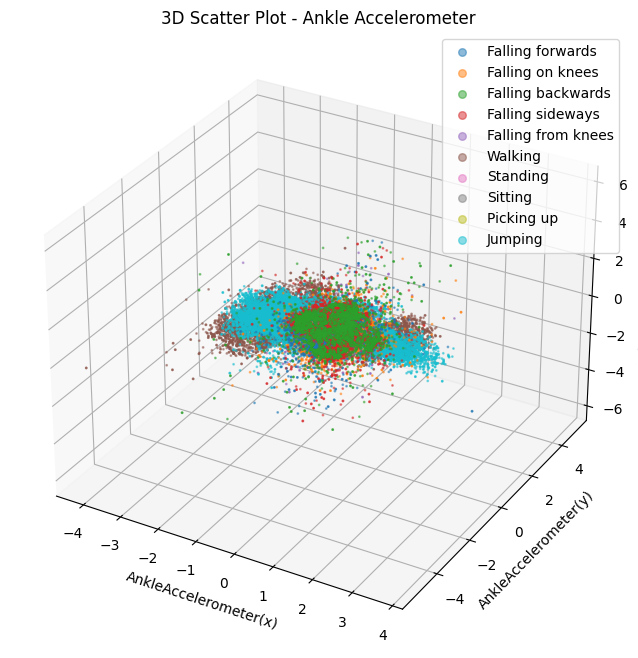

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for activity, color in zip(data_cleaned_final['ActivityLabel'].unique(), plt.cm.tab10.colors):
    subset = data_cleaned_final[data_cleaned_final['ActivityLabel'] == activity]
    ax.scatter(subset['AnkleAccelerometer(x)'], subset['AnkleAccelerometer(y)'], subset['AnkleAccelerometer(z)'],
               s=1, alpha=0.5, label=activity, color=color, marker='o')

ax.set_xlabel('AnkleAccelerometer(x)')
ax.set_ylabel('AnkleAccelerometer(y)')
ax.set_zlabel('AnkleAccelerometer(z)')
ax.set_title('3D Scatter Plot - Ankle Accelerometer')
legend = ax.legend()
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])

plt.show()

<ipython-input-16-a08aa096854f>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


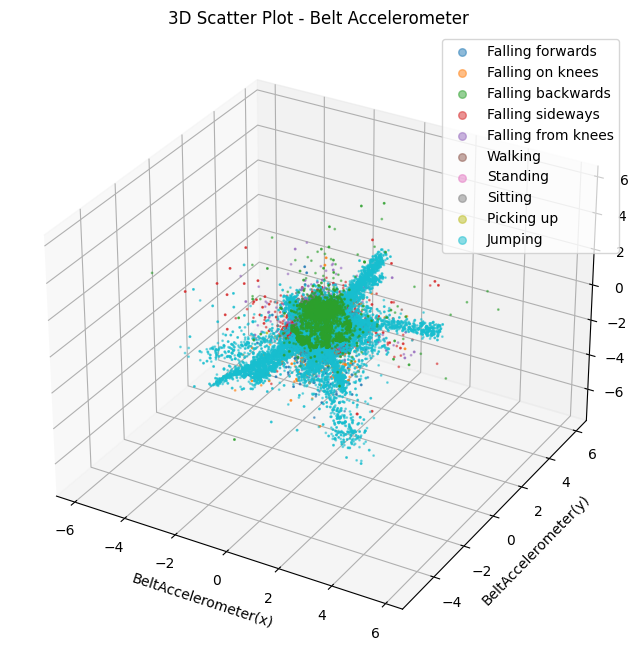

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for activity, color in zip(data_cleaned_final['ActivityLabel'].unique(), plt.cm.tab10.colors):
    subset = data_cleaned_final[data_cleaned_final['ActivityLabel'] == activity]
    ax.scatter(subset['BeltAccelerometer(x)'], subset['BeltAccelerometer(y)'], subset['BeltAccelerometer(z)'],
               s=1, alpha=0.5, label=activity, color=color, marker='o')

ax.set_xlabel('BeltAccelerometer(x)')
ax.set_ylabel('BeltAccelerometer(y)')
ax.set_zlabel('BeltAccelerometer(z)')
ax.set_title('3D Scatter Plot - Belt Accelerometer')
legend = ax.legend()
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])

plt.show()

<ipython-input-17-2ba8815438e6>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


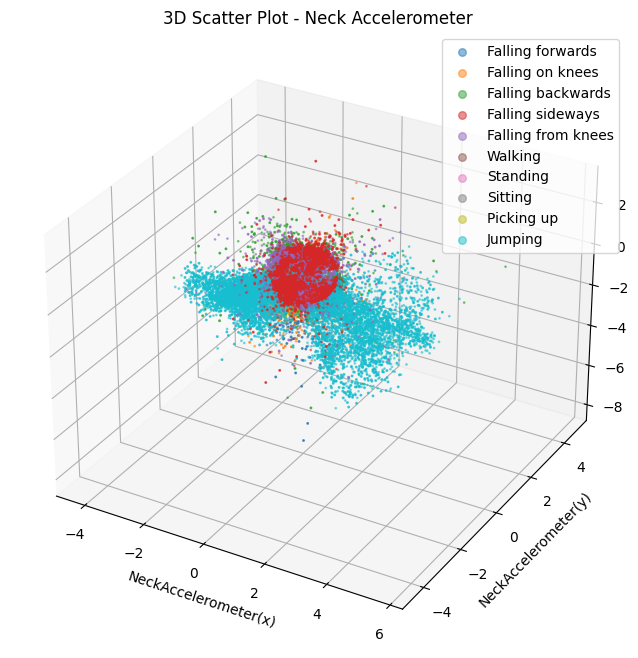

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for activity, color in zip(data_cleaned_final['ActivityLabel'].unique(), plt.cm.tab10.colors):
    subset = data_cleaned_final[data_cleaned_final['ActivityLabel'] == activity]
    ax.scatter(subset['NeckAccelerometer(x)'], subset['NeckAccelerometer(y)'], subset['NeckAccelerometer(z)'],
               s=1, alpha=0.5, label=activity, color=color, marker='o')

ax.set_xlabel('NeckAccelerometer(x)')
ax.set_ylabel('NeckAccelerometer(y)')
ax.set_zlabel('NeckAccelerometer(z)')
ax.set_title('3D Scatter Plot - Neck Accelerometer')
legend = ax.legend()
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])

plt.show()

<ipython-input-18-067eefe745dc>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legend_handle in legend.legendHandles:


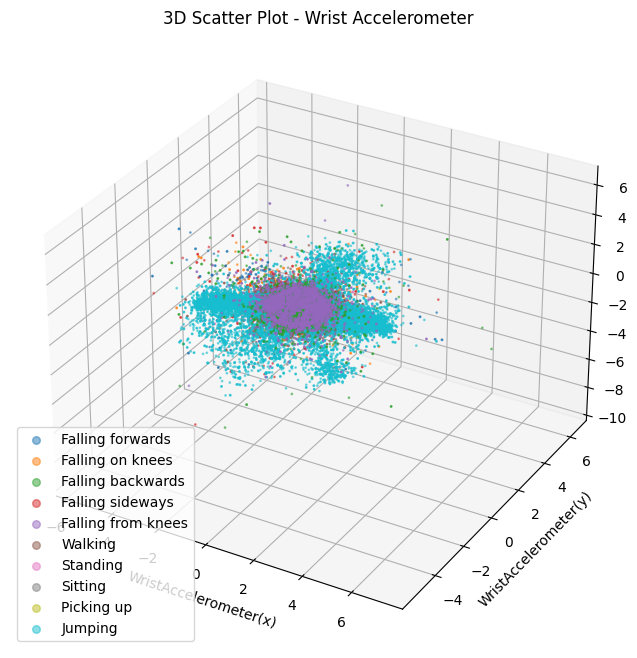

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for activity, color in zip(data_cleaned_final['ActivityLabel'].unique(), plt.cm.tab10.colors):
    subset = data_cleaned_final[data_cleaned_final['ActivityLabel'] == activity]
    ax.scatter(subset['WristAccelerometer(x)'], subset['WristAccelerometer(y)'], subset['WristAccelerometer(z)'],
               s=1, alpha=0.5, label=activity, color=color, marker='o')

ax.set_xlabel('WristAccelerometer(x)')
ax.set_ylabel('WristAccelerometer(y)')
ax.set_zlabel('WristAccelerometer(z)')
ax.set_title('3D Scatter Plot - Wrist Accelerometer')
legend = ax.legend()
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([30])

plt.show()

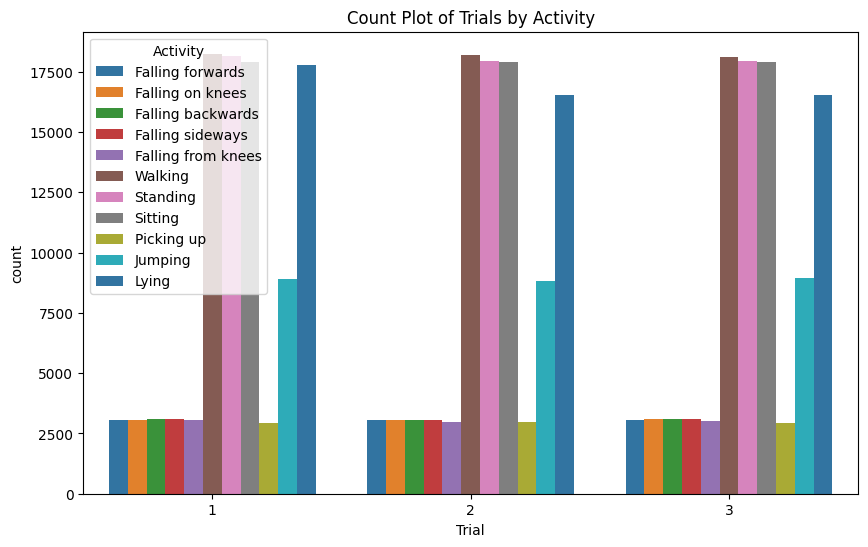

In [25]:
plt.figure(figsize=(10, 6))
trial_count_plot = sns.countplot(x='Trial', hue='ActivityLabel', data=data_cleaned_final, palette='tab10')

trial_count_plot.set_title('Count Plot of Trials by Activity')
trial_count_plot.legend(title='Activity')

plt.show()

The provided bar chart illustrates the frequency of different activities across three trials. Notably, activities such as 'Standing', 'Sitting', 'Walking' and 'Lying' dominate the count, suggesting these activities were either more common or had longer durations within the trials. In contrast, dynamic activities like 'Jumping' and 'Picking up' are less frequent, possibly due to their shorter duration or fewer repetitions within the trials. This visualization can help identify which activities are most and least represented in the dataset.

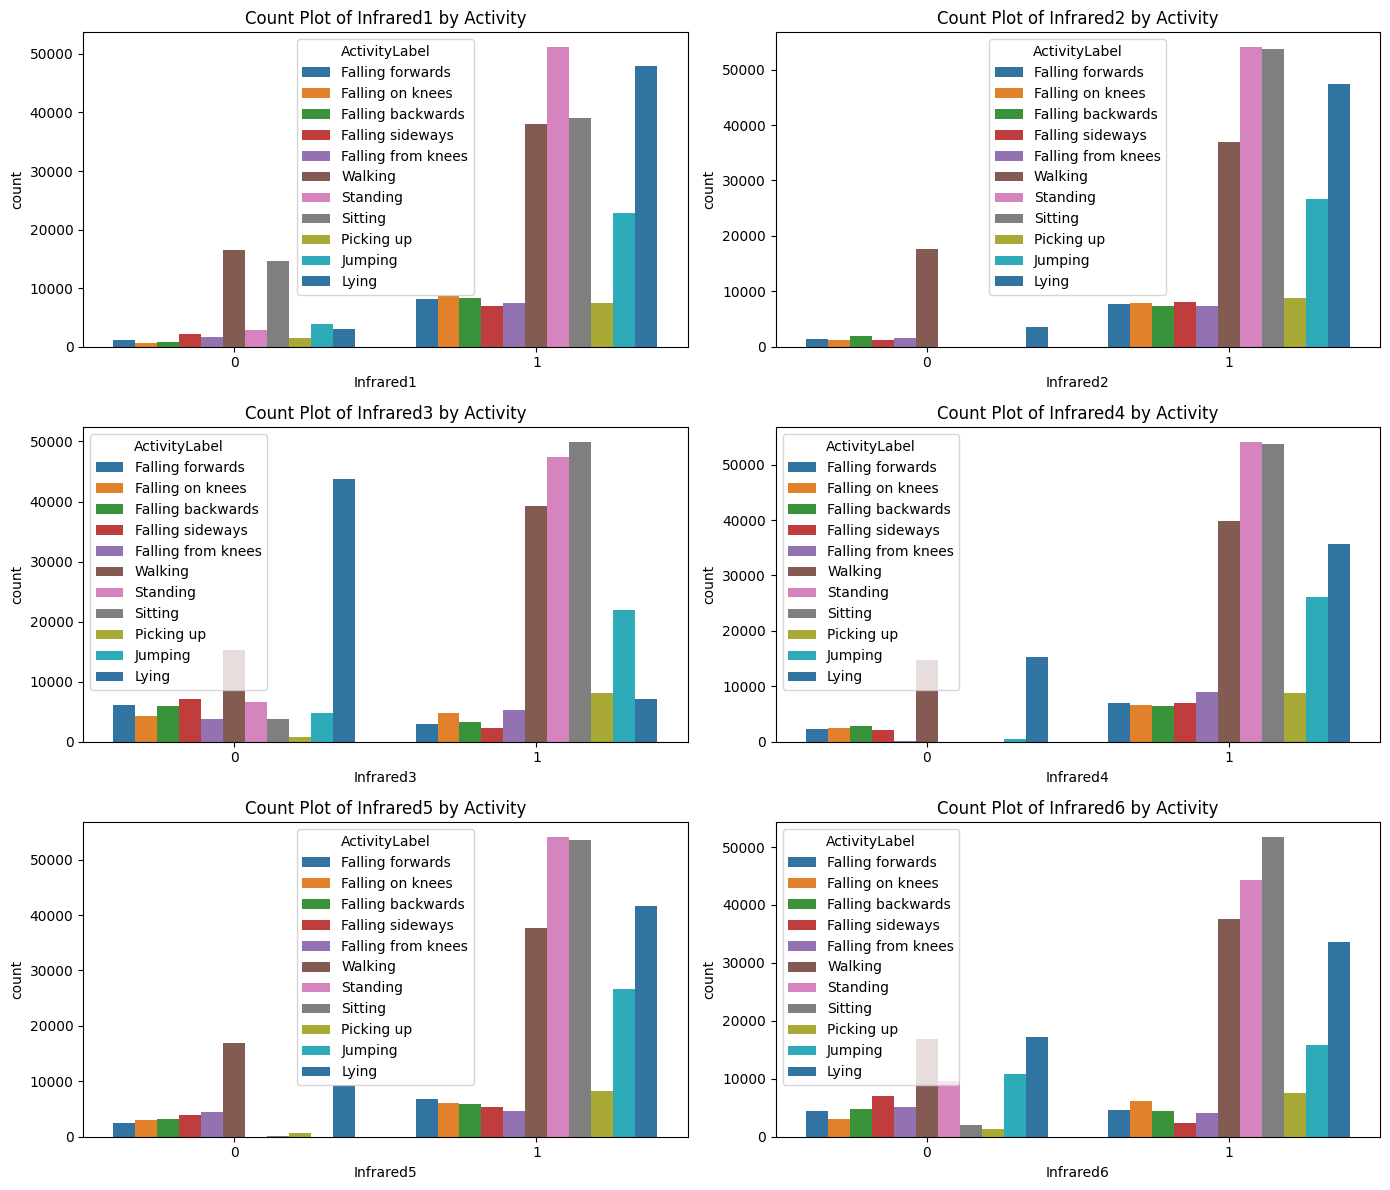

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

infrared_features = ['Infrared1', 'Infrared2', 'Infrared3', 'Infrared4', 'Infrared5', 'Infrared6']  

for i, feature in enumerate(infrared_features):
    row, col = divmod(i, 2)
    sns.countplot(ax=axes[row, col], x=feature, hue='ActivityLabel', data=data_cleaned_final, palette='tab10')

    axes[row, col].set_title(f'Count Plot of {feature} by Activity')
    
plt.tight_layout()

plt.show()

**Infrared Features Count Plots:**

The count plots for the infrared features (Infrared1 to Infrared6) show the distribution of various activities when the infrared sensors are in two different states 'on' and 'off'. In these plots, we can discern if certain activities are more likely to occur in the presence or absence of whatever condition the infrared sensors are measuring. For example, if "Falling from knees" is more frequent when Infrared1 is active, it might suggest that this activity is more common in the conditions under which the sensor is triggered.


In [ ]:
target = data_cleaned_final['Activity']
X = data_cleaned_final.drop(columns='Activity')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(accuracy)
print(classification_rep)


0.9995555555555555
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       207
         2.0       1.00      1.00      1.00       205
         3.0       1.00      1.00      1.00       203
         4.0       1.00      1.00      1.00       225
         5.0       0.99      1.00      1.00       181
         6.0       1.00      1.00      1.00      1110
         7.0       1.00      1.00      1.00       695
         8.0       1.00      1.00      1.00       643
         9.0       1.00      1.00      1.00       104
        10.0       1.00      1.00      1.00       326
        11.0       1.00      1.00      1.00       601

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
cv_rf_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cv_rf_model.fit(X_train_scaled, y_train)

best_params = cv_rf_model.best_params_
best_score = cv_rf_model.best_score_

y_pred = cv_rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Set Accuracy:", test_accuracy)
print("Classification Report:\n", classification_rep)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9997777160322311
Test Set Accuracy: 0.9997777777777778
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       207
         2.0       1.00      1.00      1.00       205
         3.0       1.00      1.00      1.00       203
         4.0       1.00      1.00      1.00       225
         5.0       1.00      1.00      1.00       181
         6.0       1.00      1.00      1.00      1110
         7.0       1.00      1.00      1.00       695
         8.0       1.00      1.00      1.00       643
         9.0       1.00      1.00      1.00       104
        10.0       1.00      1.00      1.00       326
        11.0       1.00      1.00      1.00       601

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      450

In [ ]:
import pickle
with open('rf_model.pickle', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("Model saved successfully.")

Model saved successfully.


In [ ]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

param_grid = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}

for model_name, model in models.items():
    print(f"Working on model: {model_name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Cross-Validation Score for {model_name}: {best_score}")

    y_pred = grid_search.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Test Set Accuracy for {model_name}: {test_accuracy}")
    print(f"Classification Report for {model_name}:\n{classification_rep}\n")

Working on model: RandomForest
Best Parameters for RandomForest: {'max_depth': None, 'n_estimators': 200}
Best Cross-Validation Score for RandomForest: 0.999722145040289
Test Set Accuracy for RandomForest: 0.9997777777777778
Classification Report for RandomForest:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       207
         2.0       1.00      1.00      1.00       205
         3.0       1.00      1.00      1.00       203
         4.0       1.00      1.00      1.00       225
         5.0       1.00      1.00      1.00       181
         6.0       1.00      1.00      1.00      1110
         7.0       1.00      1.00      1.00       695
         8.0       1.00      1.00      1.00       643
         9.0       1.00      1.00      1.00       104
        10.0       1.00      1.00      1.00       326
        11.0       1.00      1.00      1.00       601

    accuracy                           1.00      4500
   macro avg       1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for LogisticRegression: {'C': 10}
Best Cross-Validation Score for LogisticRegression: 0.9591019264610541
Test Set Accuracy for LogisticRegression: 0.9626666666666667
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

         1.0       0.87      0.90      0.89       207
         2.0       0.88      0.88      0.88       205
         3.0       0.91      0.89      0.90       203
         4.0       0.97      0.82      0.89       225
         5.0       0.85      0.85      0.85       181
         6.0       0.94      0.97      0.96      1110
         7.0       1.00      1.00      1.00       695
         8.0       1.00      1.00      1.00       643
         9.0       1.00      1.00      1.00       104
        10.0       1.00      1.00      1.00       326
        11.0       1.00      1.00      1.00       601

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg  

In [ ]:
for model_name, model in models.items():
    model_filename = f'{model_name}_model.pickle'
    with open(model_filename, 'wb') as model_file:
        pickle.dump(model, model_file)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
from keras.utils import to_categorical

y_train = y_train - 1
y_test = y_test - 1

number_of_classes = len(np.unique(y_train))

# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes=number_of_classes)
y_test_encoded = to_categorical(y_test, num_classes=number_of_classes)

model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/20
450/450 [==============================] - 5s 8ms/step - loss: 18.8430 - accuracy: 0.5890 - val_loss: 3.6456 - val_accuracy: 0.6839
Epoch 2/20
450/450 [==============================] - 2s 4ms/step - loss: 2.2546 - accuracy: 0.7326 - val_loss: 1.6934 - val_accuracy: 0.7789
Epoch 3/20
450/450 [==============================] - 2s 4ms/step - loss: 1.4827 - accuracy: 0.7757 - val_loss: 1.4294 - val_accuracy: 0.8089
Epoch 4/20
450/450 [==============================] - 2s 4ms/step - loss: 1.1678 - accuracy: 0.8047 - val_loss: 1.0687 - val_accuracy: 0.8200
Epoch 5/20
450/450 [==============================] - 2s 4ms/step - loss: 0.9877 - accuracy: 0.8185 - val_loss: 0.9932 - val_accuracy: 0.8347
Epoch 6/20
450/450 [==============================] - 2s 4ms/step - loss: 0.7562 - accuracy: 0.8435 - val_loss: 0.6757 - val_accuracy: 0.8842
Epoch 7/20
450/450 [==============================] - 2s 5ms/step - loss: 0.7229 - accuracy: 0.8532 - val_loss: 0.7695 - val_accuracy: 0.8569
Epoch

In [ ]:
with open('keras_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Keras model saved successfully.")

Keras model saved successfully.
